In [1]:
import pandas as pd
df = pd.read_csv("../data/dataset_combined_pretranslation_taba.csv") 

lang_counts = df["language"].value_counts(dropna=False)

print(lang_counts)

zh    352078
ja     59382
en     58184
id     30188
es     22557
fa     15979
pt     12072
ko      4138
tr      3086
it      2138
ar      1724
fr      1663
uk       850
ru       819
nl       804
de       766
hi       489
ms       315
pl       158
la        50
ur        20
mr        20
tl        16
ta        12
th        10
jv         7
ne         7
ca         4
an         4
sv         2
el         2
sw         1
sq         1
lb         1
eu         1
vi         1
cs         1
is         1
gl         1
Name: language, dtype: int64


In [2]:
num_languages = df["language"].nunique()
print(num_languages)

39


# we keep only the West countries and deleted the small dataset (less than 50 instances and the non west countries) 

In [3]:
keep_langs = {"en","es","pt","tr","it","fr","uk","ru","nl","de","pl"} #11 languages

# Keep only western languages
df_west = df[df["language"].isin(keep_langs)].copy()

print("Languages remaining:")
print(df_west["language"].value_counts())

total_instances = len(df_west)
print("Total instances in western languages:", total_instances)

Languages remaining:
en    58184
es    22557
pt    12072
tr     3086
it     2138
fr     1663
uk      850
ru      819
nl      804
de      766
pl      158
Name: language, dtype: int64
Total instances in western languages: 103097


In [ ]:
df_west.to_csv("../data/west_dataset.csv", index=False)

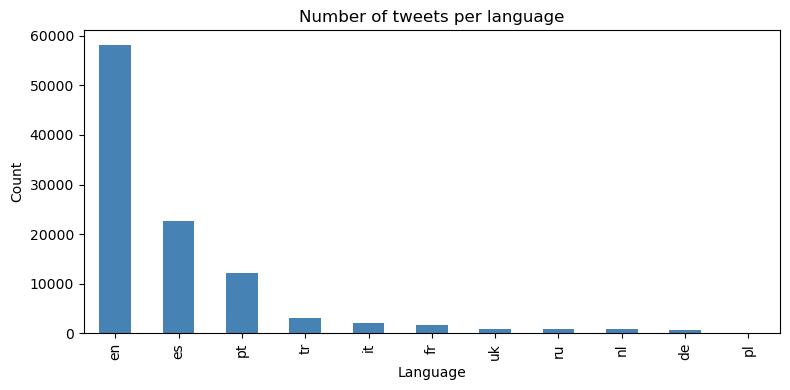

In [10]:
#visualisation
import matplotlib.pyplot as plt

lang_counts = df_west["language"].value_counts()

ax = lang_counts.plot(kind="bar", figsize=(8, 4), color="steelblue")
ax.set_xlabel("Language")
ax.set_ylabel("Count")
ax.set_title("Number of tweets per language")
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd

# load west-only dataset
df_west = pd.read_csv("../data/west_dataset.csv")

# exclude English
df_no_english = df_west[df_west["language"] != "en"].copy()
print("Languages after removing English:")
print(df_no_english["language"].value_counts())


Languages after removing English:
es    22557
pt    12072
tr     3086
it     2138
fr     1663
uk      850
ru      819
nl      804
de      766
pl      158
Name: language, dtype: int64


In [7]:
import math

# Total rows
n = len(df_no_english)
half = n // 2

# first gets half, second gets the rest
df_part1 = df_no_english.iloc[:half].copy()
df_part2 = df_no_english.iloc[half:].copy()

print(len(df_part1), len(df_part2))

22456 22457


In [8]:
df_part1.to_csv("../data/translate_part1.csv", index=False)
df_part2.to_csv("../data/translate_part2.csv", index=False)